# Database Query and Heatmap (V2)

Library Initialization

In [1]:
from Modules.database_gen_sqlite import gen_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

Database Generation Parameters

In [2]:
wall_width, wall_height = 72, 120
num_studs = 40
base_name = "test1"

Simulation Parameters

In [3]:
stud_probability = 0.25
base_stud_prob = 0.5
stud_type_length = 4

Generate Database

In [4]:
database_path = gen_data(base_name, wall_width, wall_height, num_studs)

Extract Data from database

In [5]:
# Connects to the database
con = sqlite3.connect(database_path)
cur = con.cursor()

In [6]:
# Query entire data in table
cur.execute("SELECT MAX(session_id) FROM sessions")
max_session = cur.fetchone()[0]
cur.execute("SELECT * from stud_locations WHERE session_id=?", (max_session,))
data = cur.fetchall()

[(1, 23, 58),
 (1, 3, 62),
 (1, 120, 30),
 (1, 108, 60),
 (1, 5, 42),
 (1, 3, 26),
 (1, 70, 29),
 (1, 92, 32),
 (1, 75, 49),
 (1, 49, 24),
 (1, 44, 63),
 (1, 45, 58),
 (1, 104, 49),
 (1, 80, 67),
 (1, 72, 65),
 (1, 21, 56),
 (1, 95, 41),
 (1, 38, 48),
 (1, 109, 13),
 (1, 76, 10),
 (1, 15, 60),
 (1, 84, 69),
 (1, 72, 32),
 (1, 104, 22),
 (1, 115, 3),
 (1, 60, 69),
 (1, 59, 72),
 (1, 104, 44),
 (1, 15, 31),
 (1, 22, 27),
 (1, 2, 42),
 (1, 36, 55),
 (1, 1, 6),
 (1, 17, 21),
 (1, 5, 33),
 (1, 75, 69),
 (1, 56, 26),
 (1, 17, 28),
 (1, 101, 54),
 (1, 108, 2)]

Save data into array

In [7]:
stud_array = np.zeros([wall_height+1, wall_width+1], dtype=float)

In [8]:
# Save coordinates to numpy array
for coord in data:
   x_coord, y_coord = coord[1], coord[2]

   if(stud_array[x_coord, y_coord] > 0):
      if(stud_array[x_coord, y_coord] < 1):
         stud_array[:, y_coord] = (stud_array[x_coord,y_coord] * stud_probability) + stud_array[x_coord,y_coord]

   else:
      stud_array[:, y_coord] = 0.5

   # Expand for stud length
   for y in range(1,stud_type_length,1):
      # Only if out of bounds
      if(y_coord+y < wall_width):
         if(stud_array[x_coord, y_coord+y] < 1 and stud_array[x_coord, y_coord+y] > 0):
            stud_array[:, y_coord+y] = (stud_array[x_coord,y_coord] * stud_probability) + stud_array[x_coord,y_coord]
            continue

         stud_array[:, y_coord+y] = 0.5

Stud Data Refinement

In [9]:
stud_array[stud_array > 1] = 1
df = pd.DataFrame(stud_array)

Display Heatmap

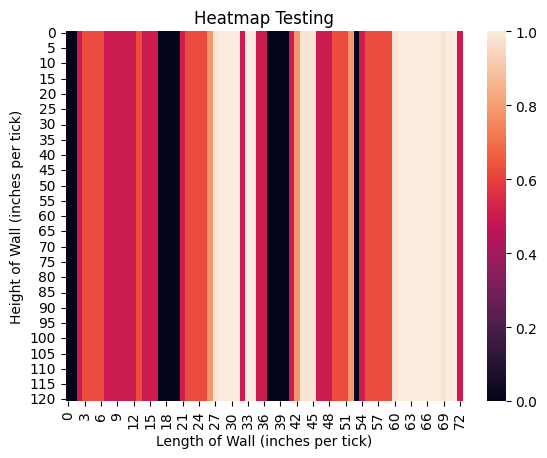

In [10]:
heat = sns.heatmap(df, vmax=1)
heat.axes.set_xlabel("Length of Wall (inches per tick)")
heat.axes.set_ylabel("Height of Wall (inches per tick)")
heat.axes.set_title("Heatmap Testing")
plt.show()